<a href="https://colab.research.google.com/github/cherotich/data_science/blob/main/Copy_of_Data_Visualisation_with_Python_Project_%5BCaroline%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Visualisation with Python Project

## 1. Defining the Question

### a) Specifying the Data Analysis Question

Specify the reasearch question that you'll be answering.

1. How many bookings were cancelled?

2. What was the booking ratio between resort hotel and city hotel?

3. What was the percentage of booking for each year?

4. Which was the busiest month for hotels?

5. Most guests came from which country?

6. How long do most people stay in hotels?

7. Which was the most booked accommodation type (Single, Couple, Family)?.

### b) Defining the Metric for Success

The solutions to the following questions will help us answer our research question:

1. When is the best time of year to book a hotel room?
2. When is the optimal length of stay in order to get the best daily rate? 
3. How will you know if a hotel was likely to receive a disproportionately high number of special requests?

### c) Understanding the context 

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.



### d) Recording the Experimental Design

The steps you will take from the beginning to the end of this project.
* Loading libraries and the data
* Loading the data 
* Data Exploration
* Data Cleaning
* Data Analysis

### e) Data Relevance

How relevant was the provided data?

## 2. Reading the Data

In [ ]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




In [ ]:
# Load the data below
# --- 
# Dataset url = 
# --- 
# YOUR CODE GOES BELOW
# 
hotel_bookings_df = pd.read_csv('/content/hotel_bookings.csv')
hotel_bookings_df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Checking the first 5 rows of data
# ---
# YOUR CODE GOES BELOW
# 
hotel_bookings_df.head()

In [ ]:
# Checking the last 5 rows of data
# ---
# YOUR CODE GOES BELOW
# 
hotel_bookings_df.tail()

In [ ]:
# Sample 10 rows of data
# ---
# YOUR CODE GOES BELOW
# 
hotel_bookings_df.sample(10)

In [ ]:
# Checking number of rows and columns
# ---
# YOUR CODE GOES BELOW
#  
hotel_bookings_df.shape

In [ ]:
# Checking datatypes
# ---
# YOUR CODE GOES BELOW
# 
hotel_bookings_df.dtypes

Record your observations below:

*   Observation 1 : The data types of the dataset is object,int64 and float64
*   Observation 2 : The dataset has 119390 records and 32 columns
*  The company column has null values



## 3. External Data Source Validation

The data is originally from the article Hotel Booking Demand Datasets, by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

## 4. Data Preparation

### Performing Data Cleaning

In [ ]:
# Checking datatypes and missing entries of all the variables
# ---
# YOUR CODE GOES BELOW
# 
hotel_bookings_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

The data types of the dataset is object,int64 and float64

In [ ]:
hotel_bookings_df.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

We observe the following from our dataset:

*   Observation 1 : company, agent,children and county have null values




In [ ]:
# Checking how many duplicate rows are there in the data
# ---
# YOUR CODE GOES BELOW
# 
hotel_bookings_df.duplicated().sum()

31994

We choose to keep the duplicates because we don't have a unique identifier to actually proof that we have duplicates.

In [ ]:
# Checking if any of the columns are all null
# ---
# YOUR CODE GOES BELOW
# 
# The percentage of null values
hotel_bookings_df.isna().sum()/(len(hotel_bookings_df))*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

We observe the following from our dataset:

*   Observation 1 : There is no column with completely null values.
*   Observation 2 : The column with the highest percentage of null values is company



In [ ]:
# Checking if any of the rows are all null
# ---
# YOUR CODE GOES BELOW
# 
hotel_bookings_df.isnull().all(1).sum()

0

In [ ]:
hotel_bookings_df.index[hotel_bookings_df.isnull().all(1)]

Int64Index([], dtype='int64')

We observe the following from our dataset:

*   Observation 1 : There is no row that has all its values to be null




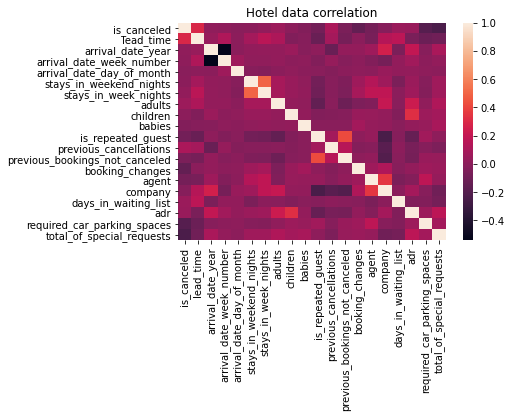

In [ ]:
# Checking the correlation of the features through the use of 
# visualizations the correlation using heatmap
# ---
# YOUR CODE GOES BELOW
# 
corr = hotel_bookings_df.corr()
sns.heatmap(corr)
plt.title('Hotel data correlation');


We observe the following from our dataset:

*   Observation 1 : Most of the variables had weak negative and positive correlation




In [ ]:
# Dropping company column because it has alot of missing values 
# and we won't need to answer any of our questions
# ---
# YOUR CODE GOES BELOW
# 
hotel_bookings_df= hotel_bookings_df.drop('company',axis=1)
hotel_bookings_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


From the data variable description we see that the Distribution Channel categoricy that tells us about Booking distribution.

1. The term “TA” means “Travel Agents” 
2. The term “TO” means “Tour Operators”

This allows us to fill the missing values in the agents column with TO

In [ ]:
# We replace the mising values i.e. for TO
# ---
# YOUR GOES BELOW
#
hotel_bookings_df["agent"].fillna("TO", inplace = True)

In [ ]:
# We drop rows where there is no adult, baby and child as 
# these records won't help us.
# ---
# YOUR GOES BELOW
#

hotel_data = hotel_bookings_df[~((hotel_bookings_df['adults']==0) & (hotel_bookings_df['children']==0.0) & (hotel_bookings_df['babies']==0))]
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,TO,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,TO,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,TO,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# We replace missing children values with rounded mean value
# ---
# Hint i.e. use round()
# ---
# YOUR GOES BELOW
#
mean_value = round(hotel_data['children'].mean(),2)
hotel_data['children'].fillna(mean_value,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
hotel_data['children'].isna().sum()

0

In [ ]:
# Checking for missing values in the dataframe
# ---
# YOUR GOES BELOW
#
hotel_data.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           478
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [ ]:
# Converting the datatypes of the following columns from float to integer
# i.e. children, company, agent
# ---
# YOUR GOES BELOW
# 
hotel_data['children'].apply(np.int64)

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: children, Length: 119210, dtype: int64


## 5. Solution Implementation

Here we investigate the questions that would help us with our recommendations.

### 5.a) Questions

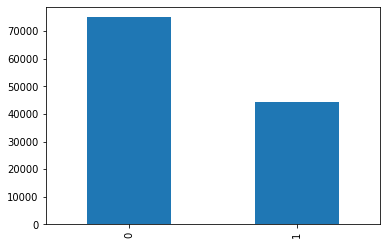

In [ ]:
# 1. How many bookings were cancelled?
# ---
# 

# First getting the data that we need 
# ---
# YOUR GOES BELOW
# 
# cancelled = hotel_data[hotel_data['is_canceled']==1]
df = hotel_data['is_canceled'].value_counts()
# df = (hotel_data['is_canceled']==1).value_counts()
df
# Then plotting a bar plot  
# ---
#
# sns.barplot(data= cancelled rot=25)
df.plot( kind = 'bar')
# 

Observation: 75011 bookings was not cancelled and 44199 bookings was cancelled.

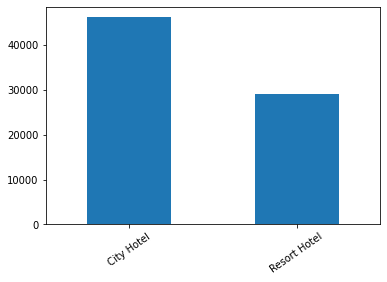

In [ ]:
# 2. What was the booking ratio between resort hotel and city hotel?
# ---
# 

# First selecting only those booking which did not get cancelled.
# ---
#
df_not_canceled = hotel_data[hotel_data['is_canceled'] == 0]
df_not_canceled


# Selecting our desired records
# ---
# YOUR GOES BELOW
booking_data = df_not_canceled[(df_not_canceled['hotel']=='Resort Hotel')| (df_not_canceled['hotel']=='City Hotel')]
ratio_data = booking_data['hotel'].value_counts()
# Then plotting a bar plot of booking ratio between resort hotel and city hotel
# ---
# YOUR GOES BELOW
ratio_data.plot(kind = 'bar', rot = 35);

In [ ]:
# 3. What was the percentage of booking for each year?
# ---
# 

# Getting our variable of interest
# ---
# YOUR GOES BELOW
df_not_canceled.head(3)
round(df_not_canceled['arrival_date_year'].value_counts()/(len(df_not_canceled))*100,2)

2016    48.39
2017    33.18
2015    18.43
Name: arrival_date_year, dtype: float64

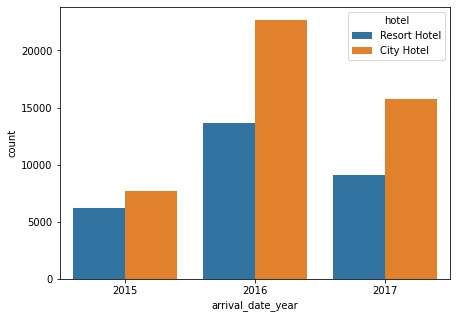

In [ ]:
# Separating the data by hotel
# ---
# 
plt.subplots(figsize=(7,5))

sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

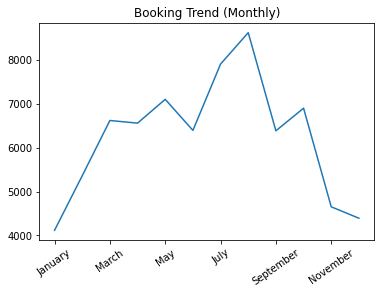

In [ ]:
# 4. Which were the most busiest months for hotels?
# ---
# 

# We would like to use our months in our x-axis so we set that
# ---
# 
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100

# Plotting our visualisation
# --- 
# 
sorted_months.plot(kind='line',rot=35,title='Booking Trend (Monthly)')
plt.y_label='Booking (%)'
plt.x_label='Months'
plt.show()
# plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))

The busiest month is July and August

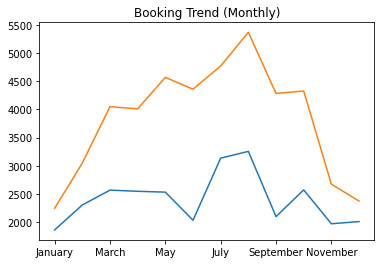

In [ ]:
# Order of months
# ---
#
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


# Select only City Hotel
# ---
#
sorted_months = df_not_canceled.loc[hotel_data.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100
sorted_months

# Select only Resort Hotel
# ---
# YOUR CODE GOES BELOW
# 
sorted_months1 = df_not_canceled.loc[hotel_data.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months1.index
y2 = sorted_months1/sorted_months1.sum()*100
sorted_months1

# Drawing the line plot
# ---
# YOUR CODE GOES BELOW
# 
# sns.lineplot(x = x1,y = y1, legend='auto' )
# sns.lineplot(x= x2, y = y2 )
# plt.legend()
# plt.show()

sorted_months1.plot(kind='line',rot=35,title='Booking Trend (Monthly)' )
sorted_months.plot(kind='line')
plt.y_label='Booking (%)'
plt.x_label='Months'
plt.show()



In [ ]:
# 5. From which top 3 countries did most guests come from?
# --- 
# YOUR GOES BELOW
#

df_not_canceled.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,TO,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,TO,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,TO,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [ ]:
top_3 = df_not_canceled['country'].value_counts()
top_3.sort_values(ascending=False).head(3)

PRT    20977
GBR     9668
FRA     8468
Name: country, dtype: int64

top 3 countries where most guests come from: 
PRT,GBR,FRA

In [ ]:
# 6.a) How long do most people stay in hotels?
#   b) By city and resort? Separate the data by hotel
# ---
# 

# Calculating the total nights
# ---
# Hint: total_nights = stays_in_weekend_nights + stay_in_week_nights.
# Also, only select 10 records.
# ---
#
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
df_not_canceled['total_nights'] = total_nights

# ---
# YOUR CODE GOES BELOW
# ---
#
# df_not_canceled.sort_values(by=['total_nights'],ascending=False)[['hotel']].value_counts()
# total_nights.sum()
total = df_not_canceled['total_nights'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
df_not_canceled['total_nights'].mode()


0    1
dtype: int64

Observation : Most people stays for 1 night.

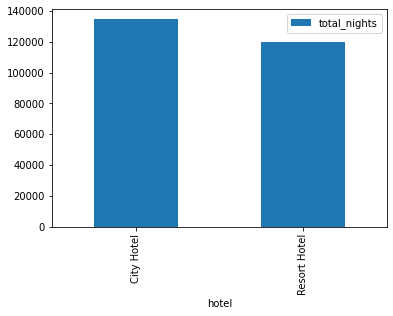

In [ ]:
# b) By city and resort? 
# Hint: Separate the data by hotel
# ---
# YOUR CODE GOES BELOW
# ---
#

city_resort = df_not_canceled.groupby(['hotel']).sum()[['total_nights']]
city_resort.plot(kind = 'bar')


Most people stayed in the city hotel.

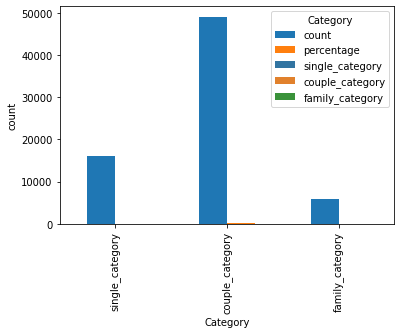

In [ ]:
# 7. Which was the most booked accommodation type (Single, Couple, Family)?
# ---
#

# Select Single, Couple, Multiple Adults and Family 

# Single
# ---
#
single = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
single.head(4)
# Couple
# ---
# YOUR GOES BELOW
#
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple.head(4)

# Family
# ---
# YOUR GOES BELOW
#
family   = df_not_canceled[(df_not_canceled.adults>=1) & ((df_not_canceled.children>=1) | (df_not_canceled.babies>=1))]
family.head(4)

# Then make the list of category names, and their total percentage
# ---
# YOUR GOES BELOW
#
data = [['single_category',single['adults'].count()], ['couple_category',couple['adults'].count()],['family_category',family['adults'].count()]]
# categories = ['single_category','couple_category','family_category']
# categories
data
categories = pd.DataFrame(data=data,columns=['Category','count'])
categories
# categories['Category'].value_counts()/(categories['count'].sum())*100
categories['percentage'] = round((categories['count']/categories['count'].sum())*100,2)
categories.plot(kind = 'bar')
# Performing our plot
# --- 
# YOUR GOES BELOW
#

sns.countplot(x='Category', hue='Category',  data=categories);


The most booked category is couple category followed by single, lastly family category.

In [ ]:
# The cancellation rate
# Which hotels have the highest cancellation rate

# 1. Cancellation rate
df_cancelled =hotel_data[hotel_data['is_canceled']==1]
rate = round((len(df_cancelled)/len(hotel_data))*100,2)
rate

37.08

The overal rate of cancelation is 37.08%

In [ ]:
df_cancelled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,TO,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108829,City Hotel,1,25,2017,May,18,6,2,1,1,0.0,0,BB,FRA,Corporate,Corporate,1,0,1,E,F,0,No Deposit,TO,0,Transient,125.0,0,0,No-Show,2017-05-06
111355,City Hotel,1,4,2017,June,23,5,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,TO,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,May,22,31,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,TO,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,TO,0,Transient,65.0,0,0,No-Show,2017-07-17


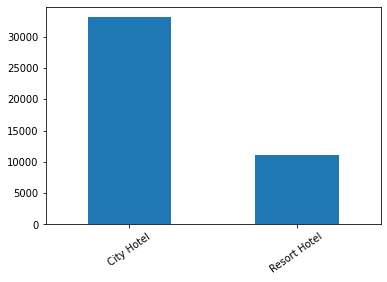

In [ ]:
cancelled_data = df_cancelled[(df_cancelled['hotel']=='Resort Hotel')| (df_cancelled['hotel']=='City Hotel')]
per_hotel = cancelled_data['hotel'].value_counts()
# Then plotting a bar plot of booking ratio between resort hotel and city hotel
# ---
# YOUR GOES BELOW
per_hotel.plot(kind = 'bar', rot = 35);

City hotel is the leading with the highest number of cancellations with 33079, resort hotel hotel has less cancellations.

### 5.b) Recommendations

From the above analysis, below are our recommendations:

1.  To provide special offers for families and single bookings to increase rates of bookings.  
2. City hotel to check on the causes of  high rates of cancellations




## 6. Challenging your Solution

During this step, we review our solution and implement  approaches that could potentially provide a better outcome. In our case, we could propose the following question that wasn't answered in our solution because it couldn't have greatly contributed to our recommendation.

In [ ]:
# When should hotels provide special offers?
# ---
# YOUR GOES BELOW
# 
df_not_canceled[ 'arrival_date_month'].value_counts()

August       8624
July         7907
May          7103
October      6901
March        6620
April        6560
June         6395
September    6385
February     5359
November     4651
December     4391
January      4115
Name: arrival_date_month, dtype: int64

Our observations:

1.  Most people book hotels in the month of May, July,August but less on January
2.  Special offers can be provided in the month of January to increase booking rate.


How does this observation tie to our solution?

Gives the busiest months of the hotels


## 7. Follow up questions

During this step, you rethink and propose other ways that you can improve your solution.

### a). Did we have the right data?
Yes

### b). Do we need other data to answer our question?

No

### c). Did we have the right question?


No